Please upload the '80 Cereals' dataset CSV file:


Saving cereal.csv to cereal (1).csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None

First Few Rows of the Dataset:
                        name mfr type  calori

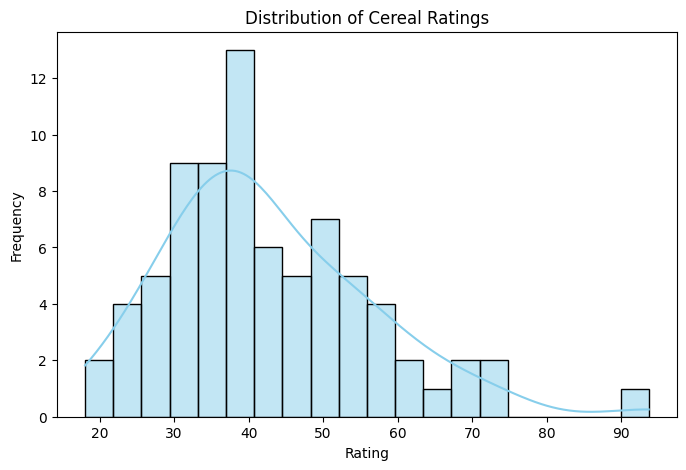

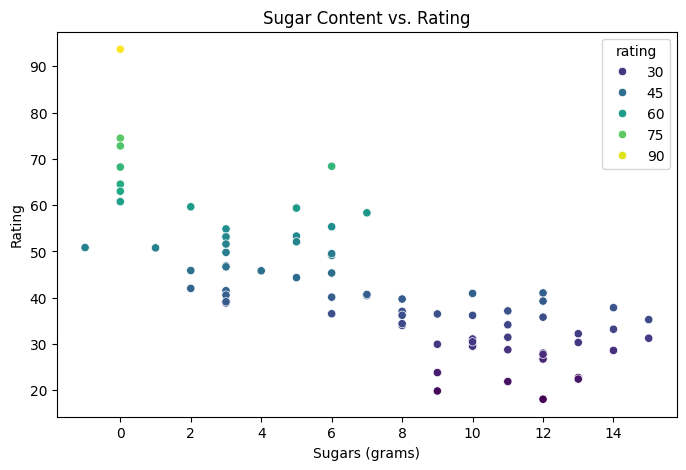

<ipython-input-14-1290f2409768>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='protein', y='rating', palette='pastel')


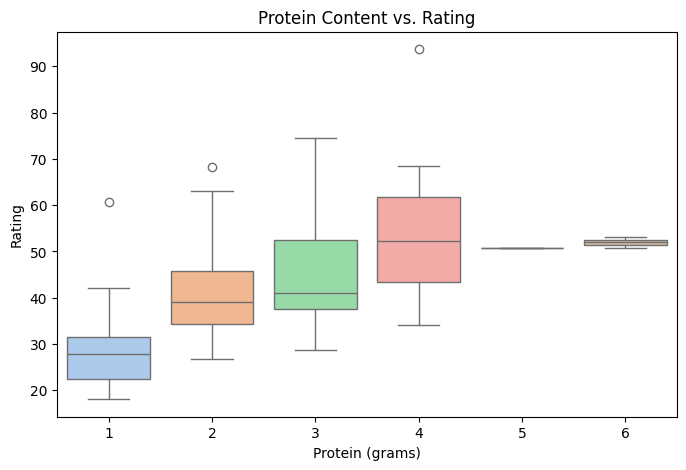


Top 5 Cereals by Rating:
                         name     rating
3   All-Bran with Extra Fiber  93.704912
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787
0                   100% Bran  68.402973
63             Shredded Wheat  68.235885


<ipython-input-14-1290f2409768>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_cereals, x='rating', y='name', palette='muted')


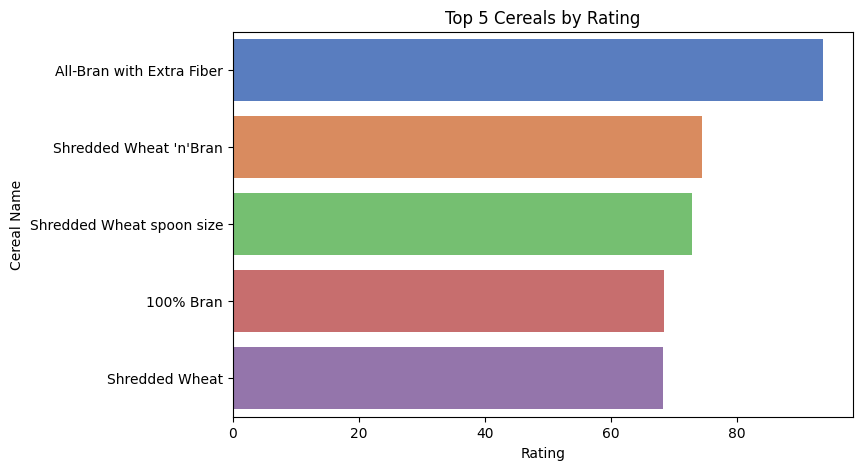

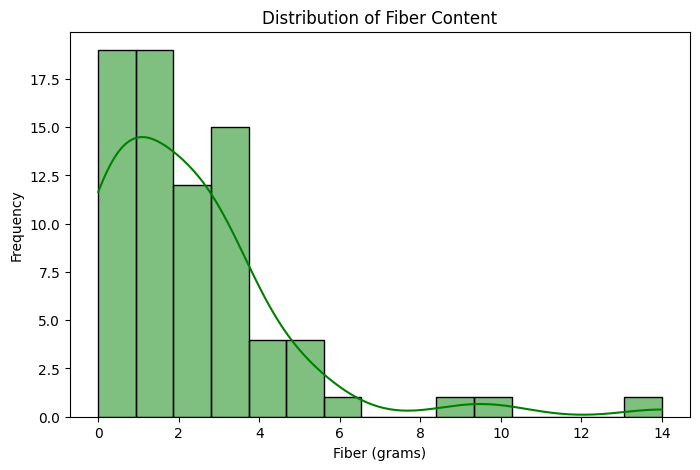

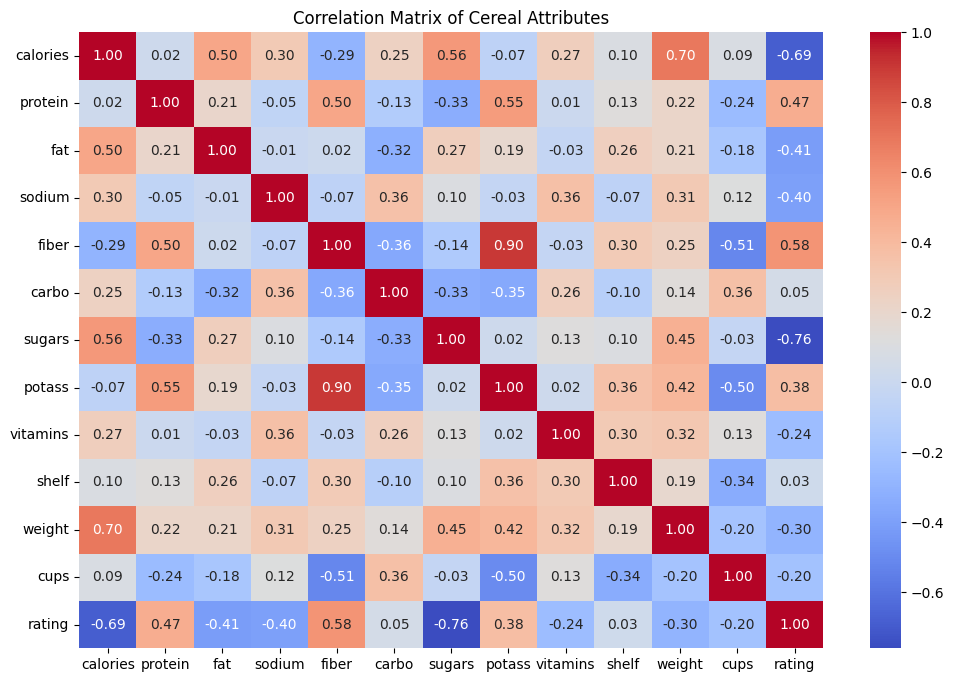


Average Rating by Manufacturer:
mfr
N    67.968567
A    54.850917
K    44.038462
Q    42.915990
P    41.705744
R    41.542997
G    34.485852
Name: rating, dtype: float64


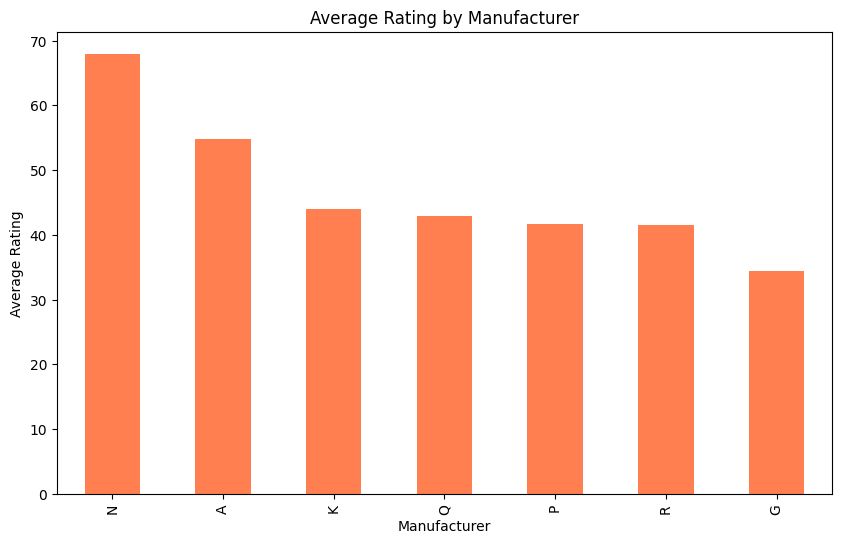

In [14]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload the dataset
print("Please upload the '80 Cereals' dataset CSV file:")
uploaded = files.upload()

# Step 2: Load the dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Step 3: Display dataset information
print("\nDataset Info:")
print(df.info())

# Step 4: Display first few rows
print("\nFirst Few Rows of the Dataset:")
print(df.head())

# Step 5: Check for missing values
print("\nMissing Values in the Dataset:")
print(df.isnull().sum())

# Step 6: Handle missing values (if any)
df = df.dropna()
print("\nDataset after handling missing values:")
print(df.info())

# Step 7: Basic analysis
print("\nBasic Statistics:")
print(df.describe())

print("\nColumns in the Dataset:")
print(df.columns)

# Step 8: Analysis and Visualizations
# 1. Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Cereal Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Sugar vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sugars', y='rating', hue='rating', palette='viridis')
plt.title('Sugar Content vs. Rating')
plt.xlabel('Sugars (grams)')
plt.ylabel('Rating')
plt.show()

# 3. Protein vs. Rating
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='protein', y='rating', palette='pastel')
plt.title('Protein Content vs. Rating')
plt.xlabel('Protein (grams)')
plt.ylabel('Rating')
plt.show()

# 4. Top 5 Cereals by Rating
top_5_cereals = df.nlargest(5, 'rating')[['name', 'rating']]
print("\nTop 5 Cereals by Rating:")
print(top_5_cereals)

# Visualization: Top 5 Cereals
plt.figure(figsize=(8, 5))
sns.barplot(data=top_5_cereals, x='rating', y='name', palette='muted')
plt.title('Top 5 Cereals by Rating')
plt.xlabel('Rating')
plt.ylabel('Cereal Name')
plt.show()

# 5. Fiber Content Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['fiber'], bins=15, kde=True, color='green')
plt.title('Distribution of Fiber Content')
plt.xlabel('Fiber (grams)')
plt.ylabel('Frequency')
plt.show()

# 6. Correlation Heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Cereal Attributes')
plt.show()

# 7. Analysis of Manufacturer-wise Average Rating
if 'mfr' in df.columns:
    manufacturer_avg_rating = df.groupby('mfr')['rating'].mean().sort_values(ascending=False)
    print("\nAverage Rating by Manufacturer:")
    print(manufacturer_avg_rating)

    # Visualization: Manufacturer Average Ratings
    plt.figure(figsize=(10, 6))
    manufacturer_avg_rating.plot(kind='bar', color='coral')
    plt.title('Average Rating by Manufacturer')
    plt.xlabel('Manufacturer')
    plt.ylabel('Average Rating')
    plt.show()
else:
    print("\nColumn 'mfr' not found in the dataset. Skipping manufacturer analysis.")
